### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

### Prepare data

In [2]:
iris = datasets.load_iris()
features = iris.data[:, :2]  # Only the first two features
target = iris.target


In [3]:
print(f"Dataset shape: {features.shape}")
print(f"Number of classes: {len(np.unique(target))}")

Dataset shape: (150, 2)
Number of classes: 3


### Train model and evaluate

In [5]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C)
svc.fit(features, target)

accuracy = accuracy_score(target, svc.predict(features))
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.82


### Plot results

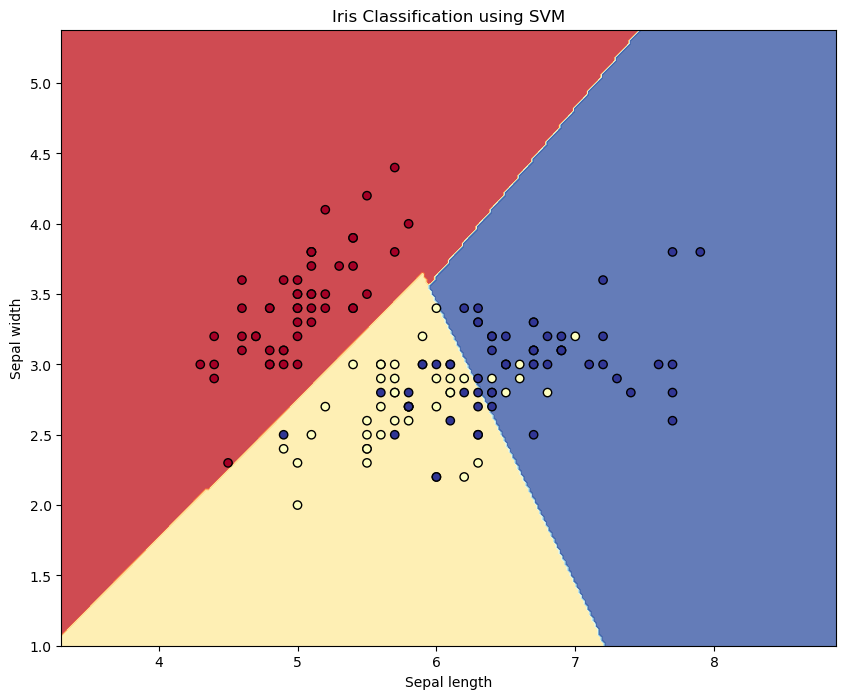

In [6]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Iris Classification using SVM')
    plt.show()

plot_decision_boundary(svc, features, target)

### Test different C values

Accuracy with C = 0.1: 0.80
Accuracy with C = 1: 0.82
Accuracy with C = 10: 0.82
Accuracy with C = 100: 0.82


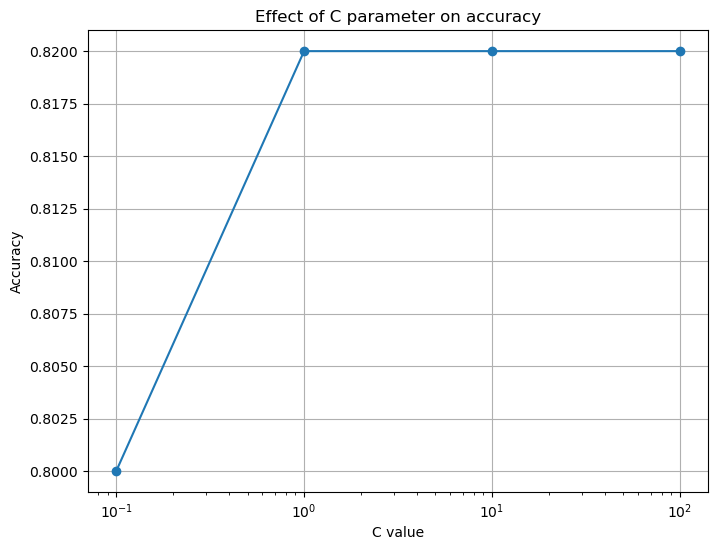

In [7]:
C_values = [0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    model = svm.SVC(kernel='linear', C=C).fit(features, target)
    accuracy = accuracy_score(target, model.predict(features))
    accuracies.append(accuracy)
    print(f"Accuracy with C = {C}: {accuracy:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Effect of C parameter on accuracy')
plt.grid(True)
plt.show()